In [34]:
from pathlib import Path

import os

import pandas as pd

In [35]:
%run "../read_and_write_docs.py"

In [36]:
%run "../scorer.py"

In [37]:
# Get the list of files in the rephrased sentences loc
# rephrased_sentences_loc = f"{g_drive_base_loc}datasets/blogger_new_algorithm/rephrased_sentences/"
# rephrased_sentences_loc = "../../../datasets/blogger/phi_rephrased"
rephrased_sentences_loc = "../../../../datasets/blogger/batch_4o_lex"
save_score_dir = "../../../../datasets/blogger/batch_4o_lex_parascore"

# Ensure the output directory exists
os.makedirs(save_score_dir, exist_ok=True)

files = [file for file in Path(rephrased_sentences_loc).iterdir() if file.is_file() and file.suffix == '.jsonl']
already_processed = [file for file in Path(save_score_dir).iterdir() if file.is_file() and file.suffix == '.jsonl']

In [38]:
already_processed

[]

In [39]:
# Convert processed files to a set of basenames (without directory path)
processed_basenames = {p.name for p in already_processed}

# Filter the unprocessed files by removing those that have already been processed
files_to_process = [p for p in files if p.name not in processed_basenames]

In [40]:
len(files_to_process)

94

In [41]:
df = read_jsonl(files[1])

In [42]:
df.iloc[0,2]

'The following is the guy code.'

In [43]:
df.iloc[0,3]

'This is the official code for fellows.'

In [44]:
df

,doc_id,chunk_id,original,rephrased
0,202213,1,The following is the guy code.,This is the official code for fellows.
1,202213,1,The following is the guy code.,What follows is an explanation of the guidelin...
2,202213,1,The following is the guy code.,What’s coming next illustrates the guy code.
3,202213,1,The following is the guy code.,The upcoming section concerns the guy code.
4,202213,1,The following is the guy code.,Herein lies the code that governs the actions ...
...,...,...,...,...
8819,202213,9,It's essential to stay optimistic during chall...,Each visitor was taken by the awe-inspiring be...
8820,202213,9,It's essential to stay optimistic during chall...,A single step is the cornerstone of any journe...
8821,202213,9,It's essential to stay optimistic during chall...,The picturesque views of the landscape held an...
8822,202213,9,It's essential to stay optimistic during chall...,Having an optimistic mindset during challengin...


In [45]:
# Initialize with the score type 'parascore_free'
parascore_free = ParaphraseScorer(score_type='parascore_free', model_type='bert-base-uncased')

/Users/user/my_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [46]:
df_with_score = parascore_free.calculate_score(df)

In [47]:
df_with_score

,doc_id,chunk_id,original,rephrased,parascore_free
0,202213,1,The following is the guy code.,This is the official code for fellows.,0.648196
1,202213,1,The following is the guy code.,What follows is an explanation of the guidelin...,0.663629
2,202213,1,The following is the guy code.,What’s coming next illustrates the guy code.,0.586310
3,202213,1,The following is the guy code.,The upcoming section concerns the guy code.,0.667004
4,202213,1,The following is the guy code.,Herein lies the code that governs the actions ...,0.508984
...,...,...,...,...,...
8819,202213,9,It's essential to stay optimistic during chall...,Each visitor was taken by the awe-inspiring be...,0.407661
8820,202213,9,It's essential to stay optimistic during chall...,A single step is the cornerstone of any journe...,0.499210
8821,202213,9,It's essential to stay optimistic during chall...,The picturesque views of the landscape held an...,0.426977
8822,202213,9,It's essential to stay optimistic during chall...,Having an optimistic mindset during challengin...,0.830228


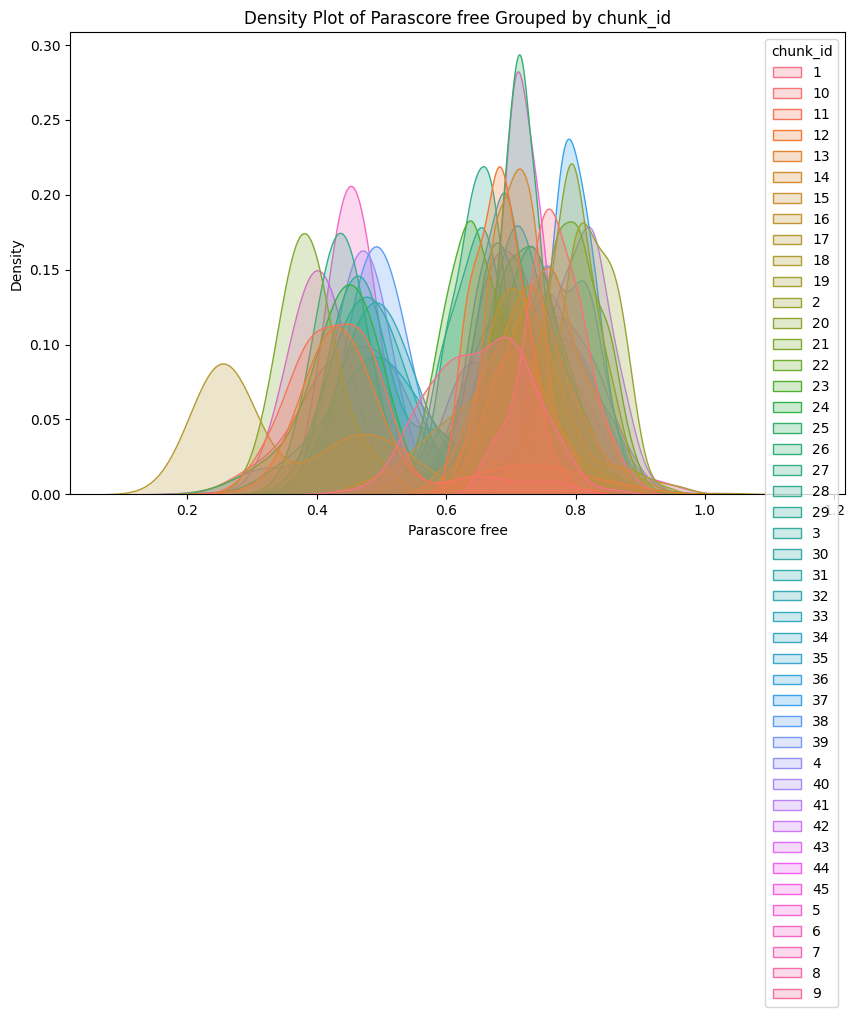

In [48]:
parascore_free.plot_density(df_with_score, grouping_column='chunk_id')

In [49]:
# Initialize with the score type 'parascore_free'
parascore_free = ParaphraseScorer(score_type='parascore_free', model_type='bert-base-uncased')

/Users/user/my_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [52]:
# Loop through each file in the files list
#for idx, file in enumerate(files):
    # Load the DataFrame
#    df = read_jsonl(file)
    
    # Calculate the score
#    df_with_score = parascore_free.calculate_score(df)
    
    # Define the output file path
#    output_file = os.path.join(save_score_dir, os.path.basename(file))
    
    # Save the modified DataFrame to the new location
#    write_jsonl(df_with_score, output_file)

    # Print the iteration number, file name, and total count
#    print(f"Processed {idx + 1} out of {len(files)}: {os.path.basename(file)}")

In [53]:
failed_files = []

for idx, file in enumerate(files):
    print(f"Processing {idx + 1} out of {len(files)}: {os.path.basename(file)}")
    try:
        # Load the DataFrame
        df = read_jsonl(file)
    
        # Calculate the score
        df_with_score = parascore_free.calculate_score(df)
    
        # Define the output file path
        output_file = os.path.join(save_score_dir, os.path.basename(file))
    
        # Save the modified DataFrame to the new location
        write_jsonl(df_with_score, output_file)
        
        print(f"    Processing Complete")
    
    except Exception as e:
        # If any error occurs, log the file that failed and the error message
        print(f"Failed to process: {e}")
        failed_files.append(file)

Processing 1 out of 94: doc_350617.jsonl
    Processing Complete
Processing 2 out of 94: doc_202213.jsonl
    Processing Complete
Processing 3 out of 94: doc_184355.jsonl
    Processing Complete
Processing 4 out of 94: doc_526719.jsonl
    Processing Complete
Processing 5 out of 94: doc_334376.jsonl
    Processing Complete
Processing 6 out of 94: doc_341238.jsonl
    Processing Complete
Processing 7 out of 94: doc_678838.jsonl
    Processing Complete
Processing 8 out of 94: doc_481359.jsonl
    Processing Complete
Processing 9 out of 94: doc_175880.jsonl
    Processing Complete
Processing 10 out of 94: doc_343349.jsonl
    Processing Complete
Processing 11 out of 94: doc_297972.jsonl
    Processing Complete
Processing 12 out of 94: doc_49343.jsonl
    Processing Complete
Processing 13 out of 94: doc_617540.jsonl
    Processing Complete
Processing 14 out of 94: doc_543206.jsonl
    Processing Complete
Processing 15 out of 94: doc_448015.jsonl
    Processing Complete
Processing 16 out of

    Processing Complete
Processing 43 out of 94: doc_148224.jsonl
    Processing Complete
Processing 44 out of 94: doc_279772.jsonl
    Processing Complete
Processing 45 out of 94: doc_116471.jsonl
    Processing Complete
Processing 46 out of 94: doc_509577.jsonl
    Processing Complete
Processing 47 out of 94: doc_325534.jsonl
    Processing Complete
Processing 48 out of 94: doc_174699.jsonl
    Processing Complete
Processing 49 out of 94: doc_155142.jsonl
    Processing Complete
Processing 50 out of 94: doc_274492.jsonl
    Processing Complete
Processing 51 out of 94: doc_222624.jsonl
    Processing Complete
Processing 52 out of 94: doc_512026.jsonl
    Processing Complete
Processing 53 out of 94: doc_433589.jsonl
    Processing Complete
Processing 54 out of 94: doc_505205.jsonl
    Processing Complete
Processing 55 out of 94: doc_317636.jsonl
    Processing Complete
Processing 56 out of 94: doc_207833.jsonl
    Processing Complete
Processing 57 out of 94: doc_544873.jsonl
    Proces

In [54]:
# After the loop, you can review the files that failed
if failed_files:
    print("\nThe following files failed during processing:")
    for failed_file in failed_files:
        print(failed_file)